In [189]:
import sys
sys.path.append("..")
from IPython.display import display

In [190]:
import numpy as np
import logging
import pickle
import time
import importlib 
import copy
import os

In [191]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)

import matplotlib as mpl
from matplotlib import rcParams
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from matplotlib import ticker
from matplotlib import colors
from matplotlib.patches import Ellipse
from matplotlib import gridspec



In [192]:
# from scripts import reclusterTree_invM as reclusterTree
# from scripts import linkageList
# from scripts import heatClustermap
# from scripts import Tree1D_invM as Tree1D
# from scripts import likelihood_invM as likelihood
# from scripts import N2Greedy_invM as N2Greedy
# from scripts import beamSearchOptimal_invM as BSO

from src.StandardHC import reclusterTree_invM as reclusterTree
from src.StandardHC import linkageList
from src.StandardHC import heatClustermap
from src.StandardHC import Tree1D_invM as Tree1D
from src.StandardHC import likelihood_invM as likelihood
from src.StandardHC import N2Greedy_invM as N2Greedy
from src.StandardHC import beamSearchOptimal_invM as BSO




In [193]:
"""Reload filles after changes"""
importlib.reload(reclusterTree)
importlib.reload(linkageList)
importlib.reload(heatClustermap)
importlib.reload(Tree1D)
importlib.reload(likelihood)
importlib.reload(N2Greedy)
# importlib.reload(bs)
importlib.reload(BSO)

<module 'src.StandardHC.beamSearchOptimal_invM' from '/Users/hanmingyang/Desktop/Research/StandardHC/examples/../src/StandardHC/beamSearchOptimal_invM.py'>

# VISUALIZATIONS

## CLUSTERING ALGORITHMS TESTED ON JETS GENERATED WITH THE TOY GENERATIVE MODEL 

Functions to run the reclustering algorithms over a list of jets

### Load jets

In [194]:
def load_jets(filename):
    root_dir = "data/"
    filename = os.path.join(root_dir, filename)
    with open(filename + ".pkl", "rb") as fd:
        Truth  = pickle.load(fd, encoding='latin-1')
    return Truth

In [172]:
# Data dir
# input_dir = "../TreeAlgorithms/data/invMassGinkgo/Truth/"
input_dir = "../data/truth/"

In [202]:
with open(input_dir+ "tree_100_truth_3" + '.pkl', "rb") as fd: 
    ts = pickle.load(fd, encoding='latin-1')

# print(ts[0]['leaves'])
print(ts[0])

{'root_id': 0, 'tree': array([[ 1, 16],
       [ 2,  5],
       [ 3,  4],
       [-1, -1],
       [-1, -1],
       [ 6, 15],
       [ 7, 14],
       [ 8, 13],
       [ 9, 12],
       [10, 11],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1]]), 'content': array([[401.1234224 , 230.94010768, 230.94010768, 230.94010768],
       [350.4865218 , 198.78043675, 204.82189469, 201.88843339],
       [150.39653506,  86.76624675,  87.91316941,  85.58986963],
       [ 88.24679022,  49.80824531,  51.02578034,  51.93503326],
       [ 62.14975673,  36.9580083 ,  36.88739602,  33.65484313],
       [200.08998674, 112.01419   , 116.90872528, 116.29856376],
       [193.04699995, 107.98853265, 112.89837406, 112.41454871],
       [135.2199738 ,  79.34436117,  79.96386774,  74.49942016],
       [123.25078557,  72.5318955 ,  72.70593609,  67.86008396],
       [ 97.81354179,  57.57131734,  57.76091591,  53.75886272],
       [ 35.40731843,  19

In [173]:
# input_jets = "tree_W_100_rate01_3.0_1.5"
# input_jets = "tree_W_100_m2min_1.0_rate01_3.0_1.5"
# input_jets = "tree_100_truth_3"
# input_jets = "400.0m1.5dp_8_15"
input_jets = "2500.0m1.5dp_8_100_1"

In [174]:
# with open(input_dir+ str(input_jets) + '.pkl', "rb") as fd: 
#     truth_jets = pickle.load(fd, encoding='latin-1')
with open(input_dir+ str(input_jets) + '.p', "rb") as fd: 
    truth_jets = pickle.load(fd, encoding='latin-1')
print(truth_jets[0])

[[ 44.51749991 -25.59072922 -23.13302901 -28.13219554]
 [  2.35953226  -1.59034284  -1.28033465  -1.16819735]
 [  0.77928378  -0.06956724  -0.28004801  -0.62169573]
 [  6.59091936  -4.7666632   -3.59859869  -2.7710721 ]
 [  4.96554293  -3.20582164  -2.08898043  -3.11261399]
 [  0.94485298  -0.67265036   0.17976167  -0.55201288]
 [  2.66532121  -1.58977682  -0.94496922  -1.88096644]
 [  0.67859501  -0.4057903   -0.36829958  -0.39912505]
 [ 18.40522112 -10.43398231 -10.89433284 -10.53720069]
 [ 11.20206745  -5.74987913  -6.95556672  -6.61287386]
 [ 17.91179398 -10.43795329 -10.48180372 -10.09142775]
 [ 10.72773731  -6.48050233  -6.53292771  -5.49493378]
 [ 13.07973072  -6.59115533  -8.1720513   -7.76844239]
 [  0.67524915  -0.37087212  -0.37009308  -0.42596445]
 [ 10.46485797  -5.87161603  -5.61736188  -6.5807484 ]
 [  9.80332057  -5.08715324  -5.39759583  -6.35562896]
 [ 19.29276932 -11.33280056 -10.72011724 -11.34026135]
 [  6.64300515  -2.89396769  -4.48467118  -3.92326801]
 [ 21.0787

In [21]:
[(i,len(jet["leaves"]) ) for i,jet in enumerate(truth_jets) if 36<=len(jet["leaves"])<38]

[]

In [205]:
input_jets = "1000_400.0m1.5dp_8_15"
with open(input_dir+ str(input_jets) + '.p', "rb") as fd: 
    truth_jets = pickle.load(fd, encoding='latin-1')
for i in range(10):
    truth_jet = truth_jets[i]["content"]
    print(truth_jet)
    print("org", sum(truth_jet["logLH"]))
    likelihood.enrich_jet_logLH(truth_jet)
    print("local", sum(truth_jet["logLH"]))
    greedyJet = N2Greedy.recluster(
        truth_jet,
        delta_min=truth_jet["pt_cut"],
        lam=float(truth_jet["Lambda"]),
        visualize = True,
    )
    print("greedy", sum(greedyJet["logLH"]))
    BSO_jet = BSO.recluster(
        truth_jet,
        beamSize=min( 3*N, np.asarray(N * (N - 1) / 2).astype(int)),
        delta_min=truth_jet["pt_cut"],
        lam=float(truth_jet["Lambda"]),
        N_best=1,
        visualize = True,
    )[0]
    print("beam", sum(BSO_jet["logLH"]))
    print()

[[ 400.49968789 -230.94010768 -230.94010768 -230.94010768]
 [ 166.8506633   -96.21352531  -93.72116409  -98.75056245]
 [  53.65600873  -31.25055348  -29.94018712  -31.6248119 ]
 [  42.73928488  -24.71000655  -23.45849774  -25.76714172]
 [  23.24302998  -13.54068363  -12.80963275  -13.8725738 ]
 [  19.4962549   -11.16932292  -10.64886499  -11.89456792]
 [  10.91672252   -6.54054616   -6.48168864   -5.8576694 ]
 [ 113.19466039  -64.96297518  -63.78098024  -67.125754  ]
 [  75.11940783  -43.8730711   -41.91413434  -44.24238288]
 [  62.17938729  -36.27465957  -34.74143563  -36.61425782]
 [  22.40856161  -12.60027665  -12.79813575  -13.39481046]
 [  39.77082568  -23.67438292  -21.94329988  -23.21944736]
 [  12.940016     -7.59840887   -7.17269619   -7.62812239]
 [  38.07525876  -21.08990764  -21.86684938  -22.88337479]
 [   3.04007068   -1.53698475   -1.97220335   -1.69896045]
 [  35.0351868   -19.55292218  -19.89464529  -21.18441357]
 [ 233.64902459 -134.72658237 -137.21894358 -132.1895452

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [176]:
jet_name = ('_').join(input_jets.split('_')[0:3])
truth_jet["name"]=jet_name
truth_jet["algorithm"]="truth"

display(truth_jet["name"])

'2500.0m1.5dp_8_100'

In [215]:
# truth_jet

In [177]:
display(truth_jet["LambdaRoot"])
display(truth_jet["Lambda"])
display(len(truth_jet["leaves"]))
display(np.sqrt(truth_jet["Delta_0"]))
display(np.sqrt(truth_jet["pt_cut"]))
display(truth_jet["M_Hard"])

tensor(1.5000)

tensor(1.5000)

25

tensor(50.)

1.1000000173395328

50.0

### Recluster jet with generalized kt algorithms

In [71]:
# Recluster jet
recluster = True
if recluster:
    reclusterKt = reclusterTree.recluster(truth_jet, alpha=1, out_dir = "data/invMassGinkgo/visualize/")
    reclusterAntikt = reclusterTree.recluster(truth_jet, alpha=-1, out_dir = "data/invMassGinkgo/visualize/")
    reclusterCA = reclusterTree.recluster(truth_jet, alpha=0, out_dir = "data/invMassGinkgo/visualize/")

2023-09-07 02:21:32,190:INFO::Output jet filename = data/invMassGinkgo/visualize/400.0m1.5dp_8_15_1.pkl


FileNotFoundError: [Errno 2] No such file or directory: 'data/invMassGinkgo/visualize/400.0m1.5dp_8_15_1.pkl'

In [72]:
input_dir = "data/invMassGinkgo/visualize/"

# Load reclustered jets
with open(input_dir+ str(truth_jet["name"])+'_1' + '.pkl', "rb") as fd: reclusterKt = pickle.load(fd, encoding='latin-1')
with open(input_dir+ str(truth_jet["name"])+'_-1' + '.pkl', "rb") as fd: reclusterAntikt = pickle.load(fd, encoding='latin-1')
with open(input_dir+ str(truth_jet["name"])+'_0' + '.pkl', "rb") as fd: reclusterCA = pickle.load(fd, encoding='latin-1')

FileNotFoundError: [Errno 2] No such file or directory: 'data/invMassGinkgo/visualize/400.0m1.5dp_8_15_1.pkl'

### Calcualte Greedy and BS jets

In [178]:
greedyJet = N2Greedy.recluster(
    truth_jet,
    delta_min=truth_jet["pt_cut"],
    lam=float(truth_jet["Lambda"]),
    visualize = True,
) 

huh -137.85289981460798


In [179]:
N = len(truth_jet["leaves"])
BSO_jet = BSO.recluster(
        truth_jet,
        beamSize=min( 3*N, np.asarray(N * (N - 1) / 2).astype(int)),
        delta_min=truth_jet["pt_cut"],
        lam=float(truth_jet["Lambda"]),
        N_best=1,
        visualize = True,
    )[0]

huh -131.35785784753318


In [113]:
BSO_jet['content']

array([[ 400.49969582, -230.9401122 , -230.94011231, -230.94011223],
       [  68.66555565,  -41.17136173,  -34.64024169,  -42.61558542],
       [  18.64002706,  -10.8578619 ,   -9.61454767,  -11.68443679],
       [  50.02552859,  -30.31349983,  -25.02569401,  -30.93114863],
       [ 331.83414017, -189.76875047, -196.29987062, -188.32452681],
       [ 189.50428513, -110.21652949, -110.18446834, -107.77196706],
       [  69.34758825,  -40.23490192,  -40.48167457,  -39.37621592],
       [ 120.15669688,  -69.98162757,  -69.70279377,  -68.39575114],
       [  33.95234014,  -19.69713449,  -19.90241637,  -19.1894801 ],
       [  86.20435673,  -50.28449308,  -49.8003774 ,  -49.20627103],
       [  35.6793751 ,  -20.60978933,  -20.80086771,  -20.38474273],
       [  50.52498164,  -29.67470375,  -28.99950968,  -28.82152831],
       [ 142.32985504,  -79.55222097,  -86.11540228,  -80.55255975],
       [  28.40671101,  -15.22408728,  -17.74358532,  -16.0464956 ],
       [   8.48826146,   -4.406624

#### Get list necessary for visualizations

In [90]:
# def getVisualizationLists(inputJet):
    
#     jet = copy.deepcopy(inputJet)
    
#     print(jet["root_id"])
    
#     """ Traverse jet to get ancestors list """
#     tree, \
#     content, \
#     node_id, \
#     tree_ancestors = N2Greedy._traverse(
#         jet["root_id"],
#         jet["content"],
#         jetTree= jet["tree"],
#         Nleaves= jet["Nconst"],
#     )

    
#     print("content = ", content)
#     print(np.linalg.norm(content[0][1::]))
#     jet["root_id"] = 0
#     jet["node_id"] = node_id
#     jet["tree"] = np.asarray(tree).reshape(-1, 2)
#     jet["content"] = np.asarray(content).reshape(-1, 4)
#     jet["tree_ancestors"] = tree_ancestors
    
#     return jet

In [105]:
Greedy_jet = greedyJet

In [70]:
# BSO_jet = getVisualizationLists(BSO_jet)
# Greedy_jet = getVisualizationLists(greedyJet)

In [71]:
# BSO_jet["linkage_list"]

In [106]:
BSO_jet["algorithm"] = "Beam Search"
Greedy_jet["algorithm"] = "Greedy"
# reclusterKt["algorithm"] = "Kt"
# reclusterAntikt["algorithm"] = "Anti-kt"
# reclusterCA["algorithm"] ="CA"

In [107]:
fontsize ="100"

In [108]:
BSO_jet["Nconst"]

12

#### VISUALIZATIONS

Beam Search LH JET


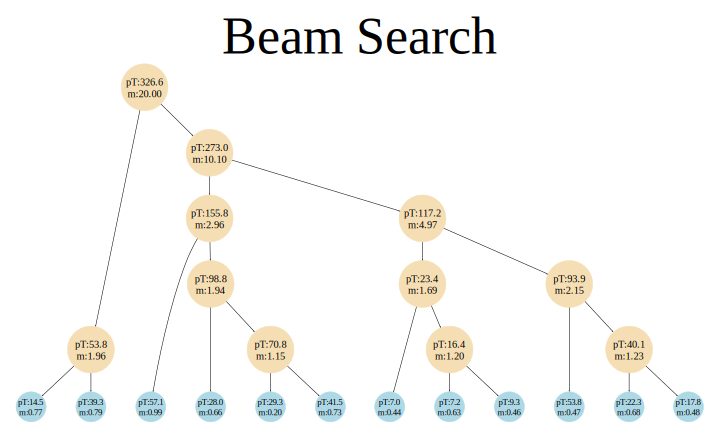

In [116]:
importlib.reload(Tree1D)
print('Beam Search LH JET')

tree = Tree1D.plotBinaryTree(
    BSO_jet,
    label=True,
    figFormat = "png",
)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01", label=r'%s'%BSO_jet["algorithm"], labelloc='t', fontsize=fontsize)
# tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="plots/1DTreeOnly/figBeamSize50_jet10")

display(tree)

Leaves ordered according to truth jet - Beam Search jet  (top) vs TRUTH (bottom) trees


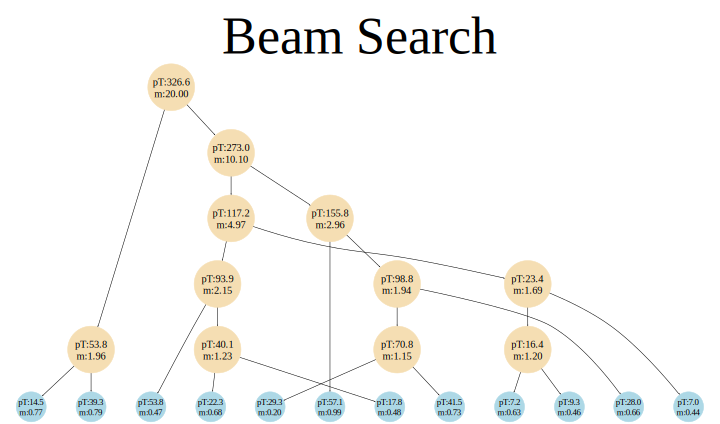

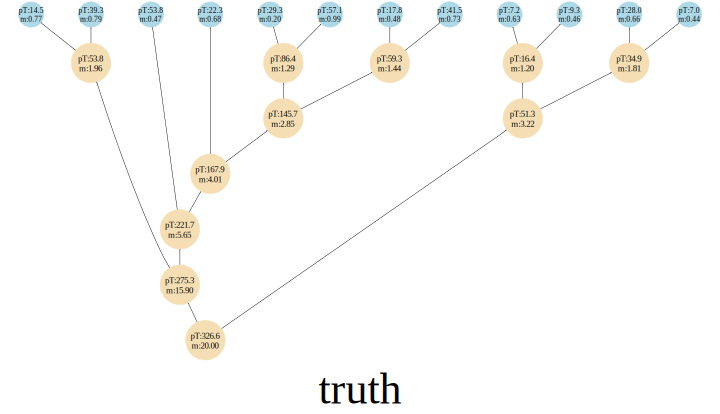

In [117]:
print("Leaves ordered according to truth jet - Beam Search jet  (top) vs TRUTH (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(
    BSO_jet,
    truth_jet,
    truthOrder = True, 
    label=True,
    figFormat = "jpg",
)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01", label=r'%s'%BSO_jet["algorithm"], labelloc='t', fontsize=fontsize)
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01", label=r'%s'%truth_jet["algorithm"], labelloc='b', fontsize=fontsize)

tree1.render(filename="plots/1DTreeOnly/jetInvM36BS_orderTruth")
tree2.render(filename="plots/1DTreeOnly/jetInvM36Truth_orderTruth")

display(tree1)
display(tree2)

Leaves ordered according to truth jet - Greedy jet  (top) vs TRUTH (bottom) trees


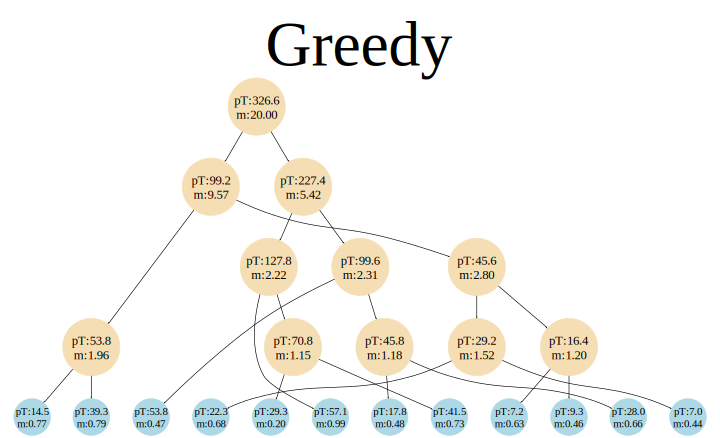

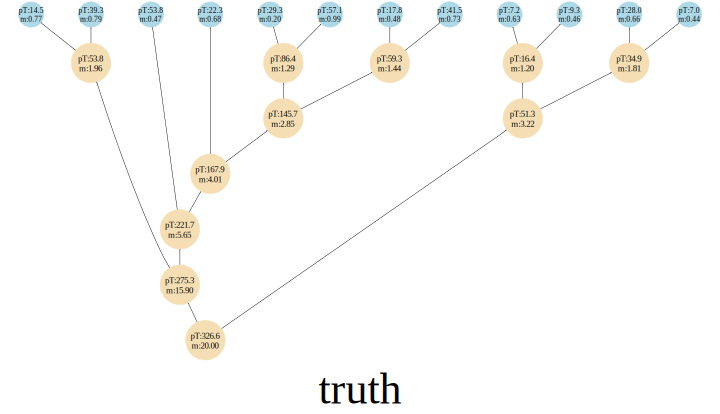

In [118]:
print("Leaves ordered according to truth jet - Greedy jet  (top) vs TRUTH (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(
    Greedy_jet,
    truth_jet,
    truthOrder = True, 
    label=True,
    figFormat = "jpg",
)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01", label=r'%s'%Greedy_jet["algorithm"], labelloc='t', fontsize=fontsize)
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01", label=r'%s'%truth_jet["algorithm"], labelloc='b', fontsize=fontsize)

# tree1.render(filename="notes/plots/jet70Greedy_orderTruth")
display(tree1)
display(tree2)

In [85]:
print("Leaves ordered according to truth jet - kt jet  (top) vs TRUTH (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(
    reclusterKt,
    truth_jet,
    truthOrder = True, 
    label=True,
    figFormat = "jpg",
)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01", label=r'%s'%reclusterKt["algorithm"], labelloc='t', fontsize=fontsize)
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01", label=r'%s'%truth_jet["algorithm"], labelloc='b', fontsize=fontsize)

# tree1.render(filename="notes/plots/jet70kt_orderTruth")

display(tree1)
display(tree2)

Leaves ordered according to truth jet - kt jet  (top) vs TRUTH (bottom) trees


NameError: name 'reclusterKt' is not defined

In [87]:
importlib.reload(Tree1D)

<module 'src.StandardHC.Tree1D_invM' from '/Users/hanmingyang/Desktop/Research/StandardHC/examples/../src/StandardHC/Tree1D_invM.py'>

Leaves ordered according to BS jet - Greedy (top) vs Beam Search (bottom) trees


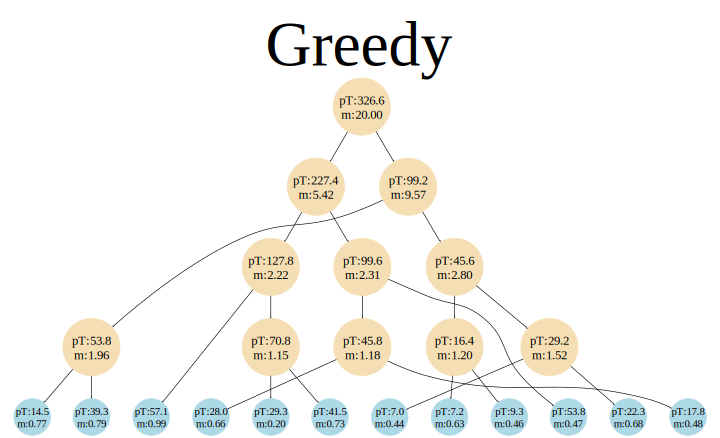

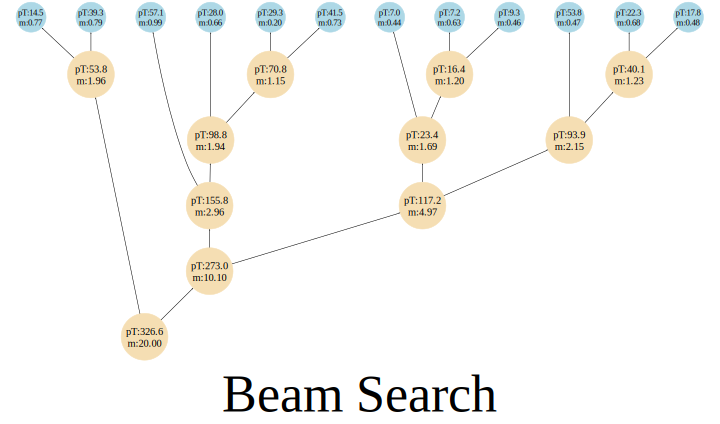

In [119]:
N=BSO_jet["Nconst"]
beamsizeList = np.minimum(np.concatenate(([1],np.arange(0.5,5.5,0.5)*N)),np.asarray(N*(N-1)/2 *np.ones(11))).astype(int)


print("Leaves ordered according to BS jet - Greedy (top) vs Beam Search (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(
    BSO_jet,
    Greedy_jet,
    truthOrder = False,
    label = True,
    alpha_jet1 =  -1,
    beamSize = beamsizeList[-1], 
    N_best = 1,
)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01", label=r'%s'%Greedy_jet["algorithm"], labelloc='t', fontsize=fontsize)
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01", label=r'%s'%BSO_jet["algorithm"], labelloc='b', fontsize=fontsize)
display(tree1)
display(tree2)

In [164]:
BSO_jet["LambdaRoot"]

3.0

In [55]:
N=BSO_jet["Nconst"]
beamsizeList = np.minimum(np.concatenate(([1],np.arange(0.5,5.5,0.5)*N)),np.asarray(N*(N-1)/2 *np.ones(11))).astype(int)
reclusterKt["M_Hard"] = 80.

print("Leaves ordered according to KT jet - Beam Search (top) vs KT (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(
    reclusterKt,
    BSO_jet,
    truthOrder = False,
    label = True,
    alpha_jet1 =  1,
    beamSize = beamsizeList[-1], 
    N_best = 1,
)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01", label=r'%s'%BSO_jet["algorithm"], labelloc='t', fontsize=fontsize)
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01", label=r'%s'%reclusterKt["algorithm"], labelloc='b', fontsize=fontsize)
display(tree1)
display(tree2)

NameError: name 'reclusterKt' is not defined

In [56]:
N=BSO_jet["Nconst"]
beamsizeList = np.minimum(np.concatenate(([1],np.arange(0.5,5.5,0.5)*N)),np.asarray(N*(N-1)/2 *np.ones(11))).astype(int)
reclusterAntikt["M_Hard"] = 80.

print("Leaves ordered according to ANTIKT jet - Beam Search (top) vs ANTIKT (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(
    reclusterAntikt,
    BSO_jet,
    truthOrder = False,
    label = True,
    alpha_jet1 =  -1,
    beamSize = beamsizeList[-1], 
    N_best = 1,
)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01", label=r'%s'%BSO_jet["algorithm"], labelloc='t', fontsize=fontsize)
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="1." , nodesep="0.01", label=r'%s'%reclusterAntikt["algorithm"], labelloc='b', fontsize=fontsize)
display(tree1)
display(tree2)

NameError: name 'reclusterAntikt' is not defined

### Truth, BS and Greedy heat maps

In [170]:
BSO_jet["algorithm"] = "Beam Search"
Greedy_jet["algorithm"] = "Greedy"
reclusterKt["algorithm"] = "Kt"
reclusterAntikt["algorithm"] = "Anti-kt"
reclusterCA["algorithm"] ="CA"

2020-03-11 10:48:19,310:INFO::truth heat data ----  row: truth -- alpha column: truth


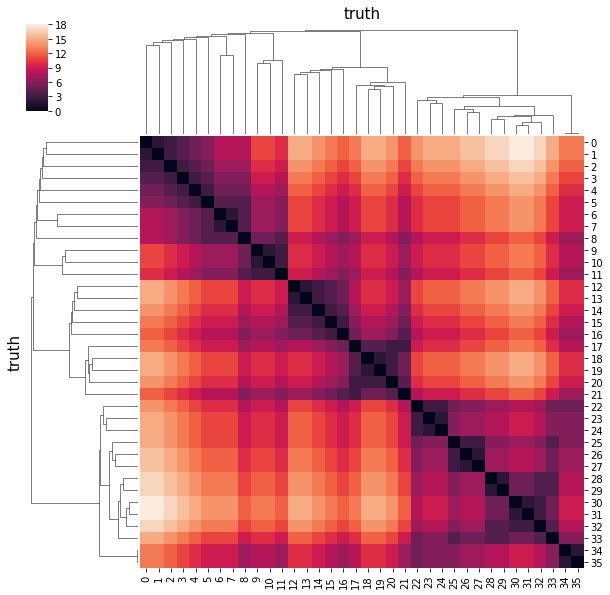

2020-03-11 10:48:19,816:INFO::Beam Search heat data ----  row: Beam Search -- alpha column: Beam Search


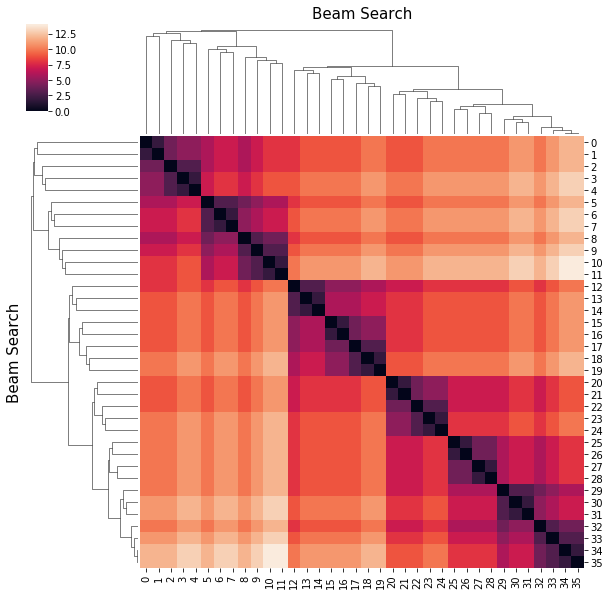

2020-03-11 10:48:20,299:INFO::Greedy heat data ----  row: Greedy -- alpha column: Greedy


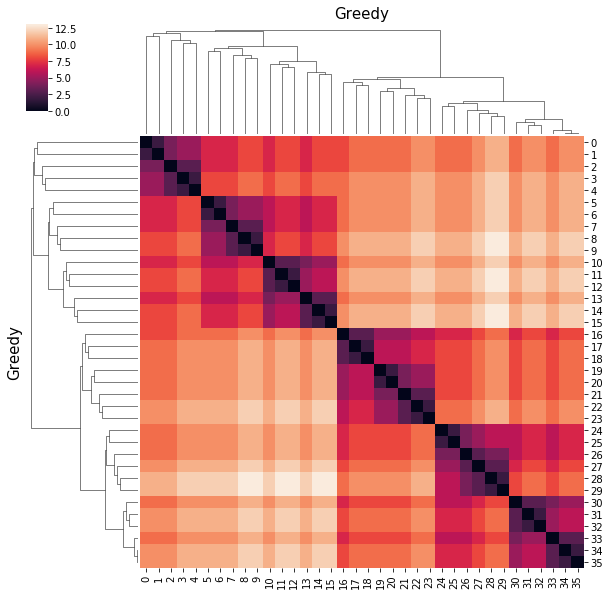

2020-03-11 10:48:20,861:INFO::Kt heat data ----  row: Kt -- alpha column: Kt


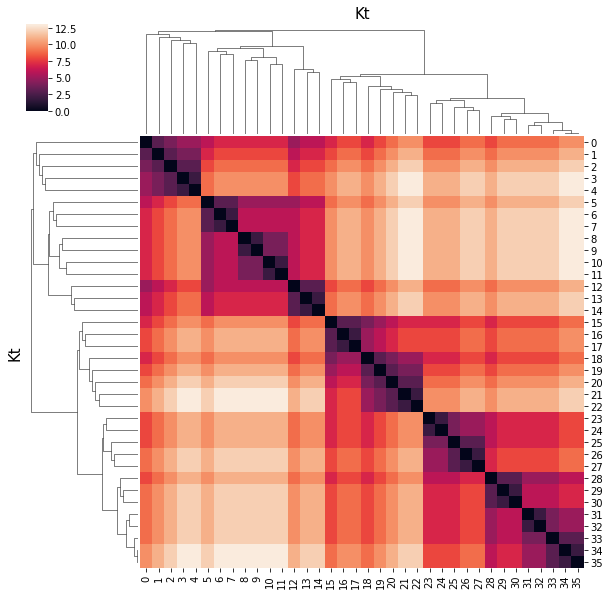

In [171]:
heatClustermap.HeatDendrogram(
    jet1=truth_jet,
    jet2=None,
    full_path=True, 
#     FigName="notes/plots/jet70TrueHeatMap_orderTruth",
)

heatClustermap.HeatDendrogram(
    jet1=BSO_jet,
    jet2=None,
    full_path=True, 
    FigName=None)

heatClustermap.HeatDendrogram(
    jet1=Greedy_jet,
    jet2=None,
    full_path=True, 
    FigName=None)

heatClustermap.HeatDendrogram(
    jet1=reclusterKt,
    jet2=None,
    full_path=True, 
    FigName=None)


### truth, BS and Greedy comparisons

2020-03-11 10:48:36,612:INFO::truth heat data ----  row: Beam Search -- alpha column: truth


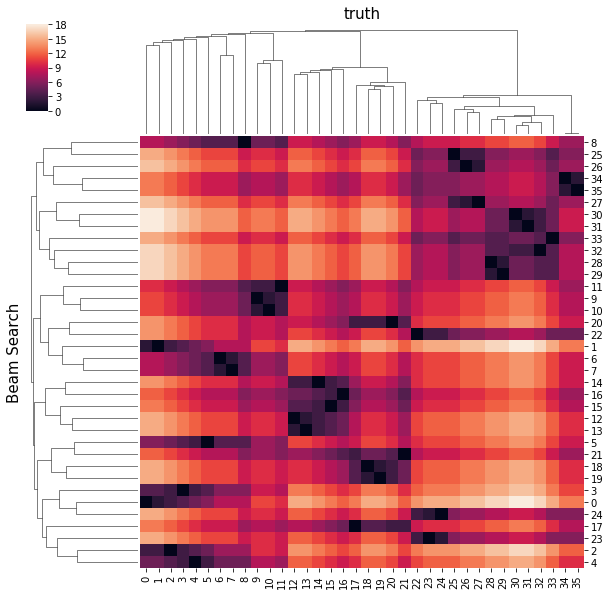

2020-03-11 10:48:37,120:INFO::truth heat data ----  row: Greedy -- alpha column: truth


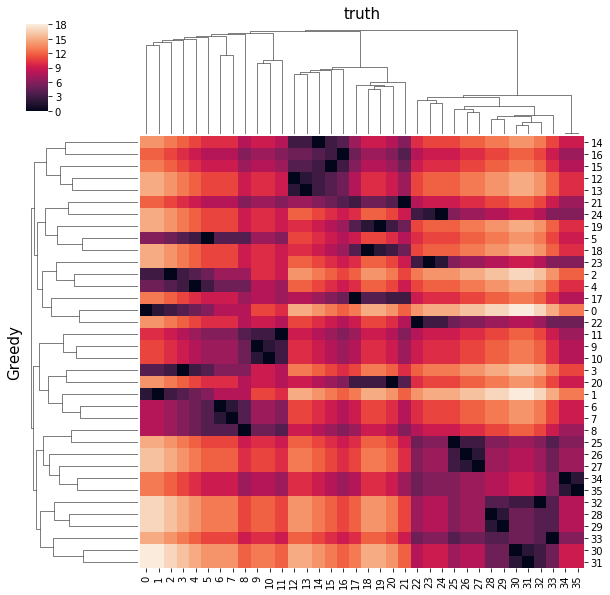

2020-03-11 10:48:37,734:INFO::truth heat data ----  row: Kt -- alpha column: truth


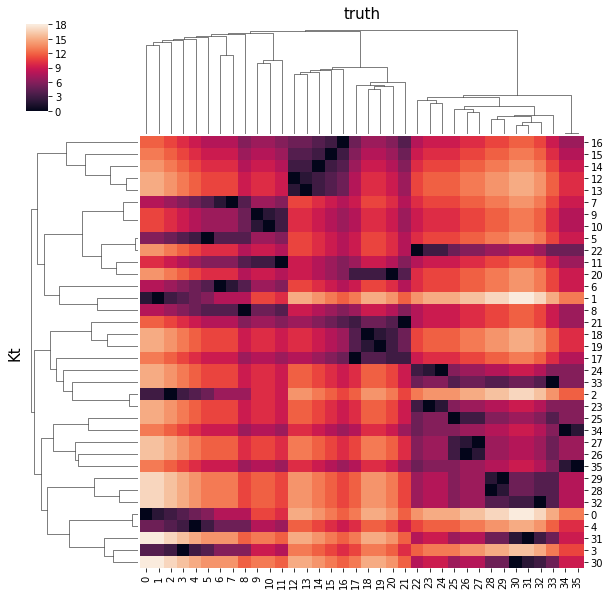

2020-03-11 10:48:38,281:INFO::Beam Search heat data ----  row: Greedy -- alpha column: Beam Search


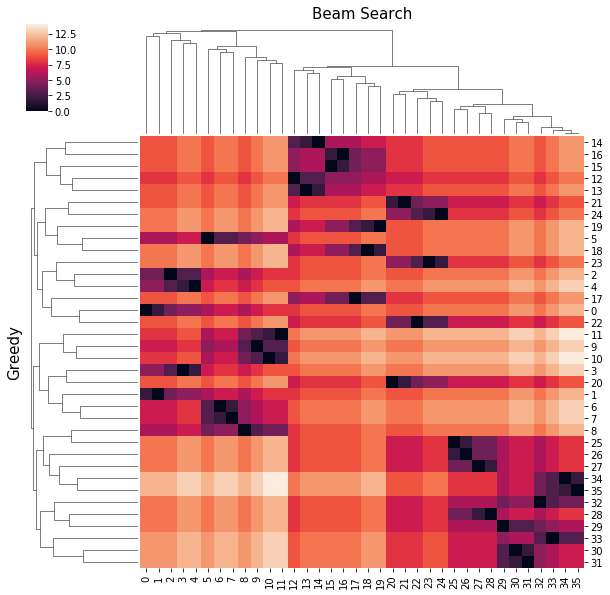

In [172]:
heatClustermap.HeatDendrogram(
    jet1=truth_jet,
    jet2=BSO_jet,
    full_path=True, 
#     FigName="notes/plots/jet70TrueHeatMap_orderBS",
)

heatClustermap.HeatDendrogram(
    jet1=truth_jet,
    jet2=Greedy_jet,
    full_path=True, 
#     FigName="notes/plots/jet70TrueHeatMap_orderGreedy",
)

heatClustermap.HeatDendrogram(
    jet1=truth_jet,
    jet2=reclusterKt,
    full_path=True, 
#     FigName="notes/plots/jet70TrueHeatMap_orderkt",
)

heatClustermap.HeatDendrogram(
    jet1=BSO_jet,
    jet2=Greedy_jet,
    full_path=True, 
    FigName=None)



In [89]:
from PIL import Image

# figName = "notes/plots/jet70TrueHeatMap_orderTruth"
# figName = "notes/plots/jet70TrueHeatMap_orderBS"
# figName = "notes/plots/jet70TrueHeatMap_orderGreedy"
# figName = "notes/plots/jet70TrueHeatMap_orderkt"


# im = Image.open(figName+".png")
# rgb_im = im.convert('RGB')
# rgb_im.save(figName+".jpg")

## CLUSTER TRELLIS PROJECT COMPARISON

In [90]:
from scripts import likelihood
import torch

ModuleNotFoundError: No module named 'scripts'

In [137]:
importlib.reload(likelihood)

<module 'src.StandardHC.likelihood_invM' from '/Users/hanmingyang/Desktop/Research/StandardHC/examples/../src/StandardHC/likelihood_invM.py'>

In [175]:
## Utils
def load_jets():
    root_dir = "../GinkgoJetsClusterTrellis/data/"
    filename = os.path.join(root_dir, "TruthBS_10")
    with open(filename + ".pkl", "rb") as fd:
        Truth10, BS10 = pickle.load(fd, encoding='latin-1')
    return Truth10, BS10

In [176]:
gt_jets, bs_jets = load_jets()

In [177]:
BSO_jet = bs_jets[26]
truth_jet = gt_jets[26]

In [178]:
float(3.6)

3.6

In [179]:
float(np.float(torch.tensor(3.6)))

3.5999999046325684

In [92]:
BSO_jet["Lambda"],BSO_jet["pt_cut"], BSO_jet["tree"] , BSO_jet["content"]

(1.5,
 1.2100000381469727,
 array([[ 1,  8],
        [ 2,  3],
        [-1, -1],
        [ 4,  5],
        [-1, -1],
        [ 6,  7],
        [-1, -1],
        [-1, -1],
        [ 9, 14],
        [10, 11],
        [-1, -1],
        [12, 13],
        [-1, -1],
        [-1, -1],
        [15, 20],
        [16, 17],
        [-1, -1],
        [18, 19],
        [-1, -1],
        [-1, -1],
        [21, 22],
        [-1, -1],
        [23, 24],
        [-1, -1],
        [-1, -1]]),
 array([[ 400.49966093, -230.9400923 , -230.94009192, -230.94009217],
        [ 241.28565674, -139.78539505, -138.39504557, -139.63104729],
        [ 115.96874831,  -65.72881634,  -67.78437824,  -67.3331151 ],
        [ 125.31690843,  -74.05657871,  -70.61066732,  -72.29793219],
        [  43.95259587,  -25.47640612,  -25.17983222,  -25.44971649],
        [  81.36431256,  -48.58017259,  -45.43083511,  -46.8482157 ],
        [  60.4392394 ,  -36.27107678,  -33.7815707 ,  -34.58226887],
        [  20.92507316,  -12.30

In [181]:
truth_jet["tree"], truth_jet["content"]

(array([[ 1,  4],
        [ 2,  3],
        [-1, -1],
        [-1, -1],
        [-1, -1]]), array([[500.     , 400.     ],
        [213.08781, 184.58928],
        [106.58575,  92.24716],
        [106.50207,  92.34212],
        [286.9122 , 215.41072]], dtype=float32))

In [180]:
display(sum(BSO_jet["logLH"]))
display(sum(truth_jet["logLH"]))

-131.35785784753318

-149.724732030832

In [165]:
# BSO_jet["Lambda"]= 3.6
BSO_jet = likelihood.enrich_jet_logLH(BSO_jet)
Greedy_jet = likelihood.enrich_jet_logLH(Greedy_jet)
truth_jet = likelihood.enrich_jet_logLH(truth_jet)

huh -167.56622884965572
huh -58.88274868755543
huh tensor(-200.8136)


In [125]:
BSO_jet.get("Lambda")

1.5

In [127]:
truth_jet["Lambda"]

tensor(1.5000)

In [164]:
# truth_jet["Lambda"]= 3.6
truth_jet = likelihood.enrich_jet_logLH(truth_jet)

huh tensor(-200.8136)


In [129]:
display(np.sum(BSO_jet["logLH"]))
display(np.sum(truth_jet["logLH"]))


-56.90199930927552

-63.348320722579956

In [188]:
pR= BSO_jet["content"][BSO_jet["tree"][0][0]]
pL= BSO_jet["content"][BSO_jet["tree"][0][1]]

In [189]:
likelihood.get_delta_LR(pL, pR)

40.000004

In [190]:
likelihood.get_delta_LR(pR, pL)

40.000004

In [136]:
fontsize ="100"

Leaves ordered according to truth jet - Beam Search jet  (top) vs TRUTH (bottom) trees


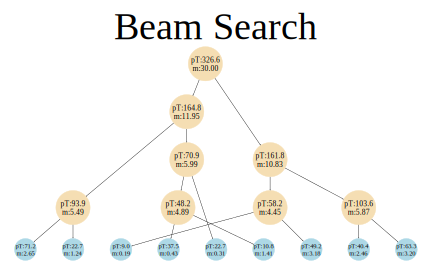

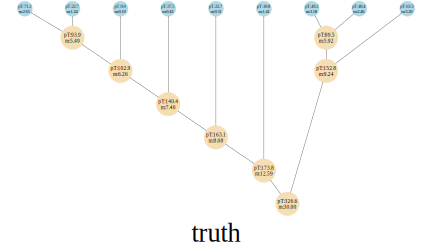

In [63]:
print("Leaves ordered according to truth jet - Beam Search jet  (top) vs TRUTH (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(
    BSO_jet,
    truth_jet,
    truthOrder = True, 
    label=True,
    figFormat = "jpg",
)
tree1.attr(rankdir='TB', size="6",margin='0' ,ratio="0.5" , nodesep="0.01", label=r'%s'%BSO_jet["algorithm"], labelloc='t', fontsize=fontsize)
tree2.attr(rankdir='BT', size="6",margin='0' ,ratio="0.5" , nodesep="0.01", label=r'%s'%truth_jet["algorithm"], labelloc='b', fontsize=fontsize)

# tree1.render(filename="notes/plots/jet70BS_orderTruth")
# tree2.render(filename="notes/plots/jet70Truth_orderTruth")

display(tree1)
display(tree2)